Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

Opening the datasets

In [3]:
D_26 = pd.read_csv("2006.csv", usecols = ['Year','Month','FlightNum','Origin'])
D_27 = pd.read_csv("2007.csv", usecols = ['Year','Month','FlightNum','Origin'])

In [4]:
D_26.dropna()
D_27.dropna()

,Year,Month,FlightNum,Origin
0,2007,1,2891,SMF
1,2007,1,462,SMF
2,2007,1,1229,SMF
3,2007,1,1355,SMF
4,2007,1,2278,SMF
...,...,...,...,...
7453210,2007,12,58,MCO
7453211,2007,12,59,ATL
7453212,2007,12,61,LAX
7453213,2007,12,62,DFW


In [5]:
DQ_26 = pd.cut(D_26['Month'], bins=[1,3,6,9,12], include_lowest=True, labels=['Quarter1','Quarter2','Quarter3','Quarter4'])
DQ_27 = pd.cut(D_27['Month'], bins=[1,3,6,9,12], include_lowest=True, labels=['Quarter1','Quarter2','Quarter3','Quarter4'])

In [6]:
D_26['Month']=DQ_26.values
D_27['Month']=DQ_27.values

In [19]:
D_26

,Year,Month,FlightNum,Origin
0,2006,Quarter1,343,ATL
1,2006,Quarter1,613,ATL
2,2006,Quarter1,617,ATL
3,2006,Quarter1,300,AUS
4,2006,Quarter1,765,AUS
...,...,...,...,...
7141917,2006,Quarter4,1675,ATL
7141918,2006,Quarter4,1676,SEA
7141919,2006,Quarter4,1676,ATL
7141920,2006,Quarter4,1677,SLC


In [8]:
D_27

,Year,Month,FlightNum,Origin
0,2007,Quarter1,2891,SMF
1,2007,Quarter1,462,SMF
2,2007,Quarter1,1229,SMF
3,2007,Quarter1,1355,SMF
4,2007,Quarter1,2278,SMF
...,...,...,...,...
7453210,2007,Quarter4,58,MCO
7453211,2007,Quarter4,59,ATL
7453212,2007,Quarter4,61,LAX
7453213,2007,Quarter4,62,DFW


In [9]:
D_26['Month'].describe()

count      7141922
unique           4
top       Quarter3
freq       1834913
Name: Month, dtype: object

In [10]:
combined = pd.concat([D_26, D_27])

In [11]:
combined

,Year,Month,FlightNum,Origin
0,2006,Quarter1,343,ATL
1,2006,Quarter1,613,ATL
2,2006,Quarter1,617,ATL
3,2006,Quarter1,300,AUS
4,2006,Quarter1,765,AUS
...,...,...,...,...
7453210,2007,Quarter4,58,MCO
7453211,2007,Quarter4,59,ATL
7453212,2007,Quarter4,61,LAX
7453213,2007,Quarter4,62,DFW


Grouping and taking the counts using Flight number variable

In [12]:
a_1= combined.groupby(['Month','Year'])['FlightNum'].count().reset_index()

In [13]:
a_1


,Month,Year,FlightNum
0,Quarter1,2006,1717751
1,Quarter1,2007,1826372
2,Quarter2,2006,1786585
3,Quarter2,2007,1875537
4,Quarter3,2006,1834913
5,Quarter3,2007,1902026
6,Quarter4,2006,1802673
7,Quarter4,2007,1849280


Plotting the barplot

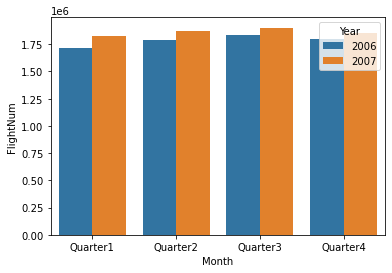

In [14]:
a1=sns.barplot(x = 'Month', y = 'FlightNum', hue = 'Year', data = a_1)


Finding the number of flights conceded in each airport in year 2006 and 2007

In [59]:
a_2= combined.groupby(['Origin','Year'])['FlightNum'].count().reset_index()

In [60]:
a_2

,Origin,Year,FlightNum
0,ABE,2006,5188
1,ABE,2007,5701
2,ABI,2006,2845
3,ABI,2007,2836
4,ABQ,2006,37264
...,...,...,...
588,YAK,2006,726
589,YAK,2007,726
590,YKM,2007,410
591,YUM,2006,3349


Location wise analysis

In [61]:
location = combined.groupby("Origin").size().sort_values(ascending = False).head(56).index

In [62]:
location

Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'IAH', 'LAS', 'EWR', 'DTW',
       'SLC', 'MSP', 'SFO', 'BOS', 'LGA', 'MCO', 'CLT', 'CVG', 'JFK', 'BWI',
       'SEA', 'PHL', 'MDW', 'SAN', 'IAD', 'DCA', 'CLE', 'TPA', 'OAK', 'FLL',
       'MEM', 'MIA', 'STL', 'HNL', 'RDU', 'SJC', 'BNA', 'MCI', 'PDX', 'SMF',
       'HOU', 'SNA', 'DAL', 'PIT', 'AUS', 'SAT', 'IND', 'ABQ', 'ONT', 'CMH',
       'JAX', 'MSY', 'BDL', 'BUR', 'PBI', 'BUF'],
      dtype='object', name='Origin')

In [63]:
location10 = combined[combined["Origin"].isin (location)]

In [64]:
location10 = location10.groupby(["Origin", "Year", "Month"]).size().reset_index()
location10.rename({0: "Count"}, axis = 1, inplace = True)

Finding the number of flights conceded in each airport in each quarter of year 2006 and 2007

In [34]:
location10

,Origin,Year,Month,Count
0,ABQ,2006,Quarter1,9055
1,ABQ,2006,Quarter2,9452
2,ABQ,2006,Quarter3,9526
3,ABQ,2006,Quarter4,9231
4,ABQ,2007,Quarter1,9022
...,...,...,...,...
443,TPA,2006,Quarter4,19783
444,TPA,2007,Quarter1,20840
445,TPA,2007,Quarter2,20133
446,TPA,2007,Quarter3,19072


In [78]:
location10.sort_values(by=['Count']).head(80)

,Origin,Year,Month,Count
288,MSY,2006,Quarter1,5894
322,PBI,2006,Quarter3,5917
48,BUF,2006,Quarter1,6085
326,PBI,2007,Quarter3,6105
55,BUF,2007,Quarter4,6137
...,...,...,...,...
199,IND,2007,Quarter4,10643
379,SAT,2006,Quarter4,10685
378,SAT,2006,Quarter3,10761
309,ONT,2007,Quarter2,10785


In [79]:
location11 = combined[combined["Origin"].isin (location)]

In [95]:
location11

,Origin,Count
6,BUF,54127
40,PBI,58071
7,BUR,65121
3,BDL,65507
36,MSY,67228
25,JAX,67548
11,CMH,74456
38,ONT,77954
0,ABQ,78425
24,IND,81191


In [96]:
location11 = location11.groupby(["Origin"]).size().reset_index()
location11.rename({0: "Count"}, axis = 1, inplace = True)

In [82]:
location11

,Origin,Count
0,ABQ,78425
1,ATL,821822
2,AUS,96152
3,BDL,65507
4,BNA,121624
5,BOS,259370
6,BUF,54127
7,BUR,65121
8,BWI,216969
9,CLE,164709


Finding the values of 80 airports which have the most number of flights conceded

In [83]:
location11.sort_values(by=['Count']).head(80)

,Origin,Count
6,BUF,54127
40,PBI,58071
7,BUR,65121
3,BDL,65507
36,MSY,67228
25,JAX,67548
11,CMH,74456
38,ONT,77954
0,ABQ,78425
24,IND,81191


In [84]:
location11 =location11.sort_values(by=['Count']).head(80)

In [85]:
location11

,Origin,Count
6,BUF,54127
40,PBI,58071
7,BUR,65121
3,BDL,65507
36,MSY,67228
25,JAX,67548
11,CMH,74456
38,ONT,77954
0,ABQ,78425
24,IND,81191


Grouping and sorting values

In [120]:
top_states = combined.groupby("Origin").size().sort_values(ascending = False).head(20).index

In [121]:
#filter only for the top 10 airports
top_10 = combined[combined["Origin"].isin (top_states)]

In [122]:
top_10 = top_10.groupby(["Origin", "Year", "Month"]).size().reset_index()
top_10.rename({0: "Count"}, axis = 1, inplace = True)

In [123]:
top_10

,Origin,Year,Month,Count
0,ATL,2006,Quarter1,98748
1,ATL,2006,Quarter2,102256
2,ATL,2006,Quarter3,105215
3,ATL,2006,Quarter4,101752
4,ATL,2007,Quarter1,96163
...,...,...,...,...
155,SLC,2006,Quarter4,35526
156,SLC,2007,Quarter1,35896
157,SLC,2007,Quarter2,36283
158,SLC,2007,Quarter3,39151


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/Change in number of flights over time by states.png'

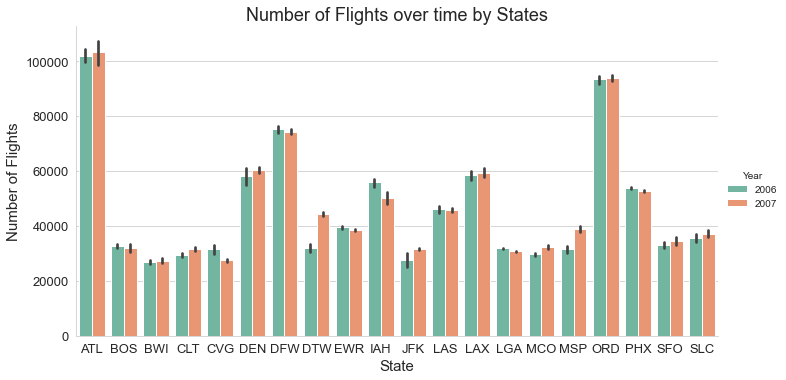

In [124]:
side = sns.catplot(data = top_10, x = "Origin", y = "Count", 
            hue = "Year", palette = "Set2", kind = "bar", aspect = 2, height = 5)

plt.xlabel("State", size = 15)
plt.ylabel("Number of Flights", size = 15)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Number of Flights over time by States", size = 18)

plt.savefig("Figures/Change in number of flights over time by states.png")
plt.show()